# Analisis Sentimen: Clash of Champions
Melakukan analisa respon netizen terhadap Acara Clash of Champions

In [ ]:
# install package
!pip install nltk sastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 2.5 MB/s eta 0:00:00


In [ ]:
# import library
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import nltk
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.util import ngrams

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from collections import Counter
from tqdm import trange
from tqdm import tqdm

import warnings
warnings.filterwarnings('ignore')

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

## Load Dataset

In [ ]:
# load dataset
df = pd.read_csv('Scraping_Youtube_Video.csv')
df.head()

,author,dates,likes,Comments
0,@Ruangguru,2024-07-03T06:39:10Z,1448,"Yuk, konsultasi dan klaim diskonnya sekarang d..."
1,@rizkifaisal5864,2024-07-14T05:31:54Z,0,Ada UPI gak sih
2,@widyawid688,2024-07-14T05:31:50Z,1,Semoga anak2ku kelak bisa berprestasi kayak m...
3,@AswandiRedmi,2024-07-14T05:23:24Z,0,Vibes nya kayak main squid game dah
4,@jovitaitalianahimady432,2024-07-14T05:15:47Z,0,KEREN ABIS❤️🔥


In [ ]:
# melihat informasi data
df.info()

In [ ]:
# menghapus data yang duplicate dan bagian yg hilang
clean_df = df.dropna().drop_duplicates()
clean_df.info()

## Preprocessing Data


In [ ]:
# membuat stopwords
factory = StopWordRemoverFactory()
stopword_factory = factory.get_stop_words()
stopword_remover = factory.create_stop_word_remover()

# membuat stemming
factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [ ]:
# menghapus karakter teks yang bukan huruf ataupun angka
def preprocess_text(text):
    # Case folding
    text = text.lower()

    # Fix slang words
    text = fix_slangwords(text)

    # menghapus tanda baca
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(text)

    stopwords_list = set(stopwords.words('indonesian'))
    stopwords_en = set(stopwords.words('english'))
    stopwords_list.update(stopwords_en)
    stopwords_list.update(['iya', 'yaa', 'gak', 'nya', 'na',"si", "sii" 'sih', 'ku', "di", "ga", "ya", "gaa", "loh", "kah", "woi", "woii", "woy", "yuk", "yuk", "nya", "sih", "kayak"])
    # Filtering stopwords with Sastrawi
    filtered_tokens = [word for word in tokens if word not in stopwords_list and word not in stopword_factory]

    # Join tokens back into text
    filtered_text = " ".join(filtered_tokens)

    return filtered_text

# Stemming teks
def stemmingText(text):
  text = stemmer.stem(text)
  return text

In [ ]:
slangwords = {"@": "di", "abis": "habis", "wtb": "beli", "masi": "masih", "wts": "jual", "wtt": "tukar", "bgt": "banget", "maks": "maksimal", "plisss": "tolong", "bgttt": "banget", "indo": "indonesia", "bgtt": "banget", "ad": "ada", "rv": "redvelvet", "plis": "tolong", "pls": "tolong", "cr": "sumber", "cod": "bayar ditempat", "adlh": "adalah", "afaik": "as far as i know", "ahaha": "haha", "aj": "saja", "ajep-ajep": "dunia gemerlap", "ak": "saya", "akika": "aku", "akkoh": "aku", "akuwh": "aku", "alay": "norak", "alow": "halo", "ambilin": "ambilkan", "ancur": "hancur", "anjrit": "anjing", "anter": "antar", "ap2": "apa-apa", "apasih": "apa sih", "apes": "sial", "aps": "apa", "aq": "saya", "aquwh": "aku", "asbun": "asal bunyi", "aseekk": "asyik", "asekk": "asyik", "asem": "asam", "aspal": "asli tetapi palsu", "astul": "asal tulis", "ato": "atau", "au ah": "tidak mau tahu", "awak": "saya", "ay": "sayang", "ayank": "sayang", "b4": "sebelum", "bakalan": "akan", "bandes": "bantuan desa", "bangedh": "banget", "banpol": "bantuan polisi", "banpur": "bantuan tempur", "basbang": "basi", "bcanda": "bercanda", "bdg": "bandung", "begajulan": "nakal", "beliin": "belikan", "bencong": "banci", "bentar": "sebentar", "ber3": "bertiga", "beresin": "membereskan", "bete": "bosan", "beud": "banget", "bg": "abang", "bgmn": "bagaimana", "bgt": "banget", "bijimane": "bagaimana", "bintal": "bimbingan mental", "bkl": "akan", "bknnya": "bukannya", "blegug": "bodoh", "blh": "boleh", "bln": "bulan", "blum": "belum", "bnci": "benci", "bnran": "yang benar", "bodor": "lucu", "bokap": "ayah", "boker": "buang air besar", "bokis": "bohong", "boljug": "boleh juga", "bonek": "bocah nekat", "boyeh": "boleh", "br": "baru", "brg": "bareng", "bro": "saudara laki-laki", "bru": "baru", "bs": "bisa", "bsen": "bosan", "bt": "buat", "btw": "ngomong-ngomong", "buaya": "tidak setia", "bubbu": "tidur", "bubu": "tidur", "bumil": "ibu hamil", "bw": "bawa", "bwt": "buat", "byk": "banyak", "byrin": "bayarkan", "cabal": "sabar", "cadas": "keren", "calo": "makelar", "can": "belum", "capcus": "pergi", "caper": "cari perhatian", "ce": "cewek", "cekal": "cegah tangkal", "cemen": "penakut", "cengengesan": "tertawa", "cepet": "cepat", "cew": "cewek", "chuyunk": "sayang", "cimeng": "ganja", "cipika cipiki": "cium pipi kanan cium pipi kiri", "ciyh": "sih", "ckepp": "cakep", "ckp": "cakep", "cmiiw": "correct me if i'm wrong", "cmpur": "campur", "cong": "banci", "conlok": "cinta lokasi", "cowwyy": "maaf", "cp": "siapa", "cpe": "capek", "cppe": "capek", "cucok": "cocok", "cuex": "cuek", "cumi": "Cuma miscall", "cups": "culun", "curanmor": "pencurian kendaraan bermotor", "curcol": "curahan hati colongan", "cwek": "cewek", "cyin": "cinta", "d": "di", "dah": "deh", "dapet": "dapat", "de": "adik", "dek": "adik", "demen": "suka", "deyh": "deh", "dgn": "dengan", "diancurin": "dihancurkan", "dimaafin": "dimaafkan", "dimintak": "diminta", "disono": "di sana", "dket": "dekat", "dkk": "dan kawan-kawan", "dll": "dan lain-lain", "dlu": "dulu", "dngn": "dengan", "dodol": "bodoh", "doku": "uang", "dongs": "dong", "dpt": "dapat", "dri": "dari", "drmn": "darimana", "drtd": "dari tadi", "dst": "dan seterusnya", "dtg": "datang", "duh": "aduh", "duren": "durian", "ed": "edisi", "egp": "emang gue pikirin", "eke": "aku", "elu": "kamu", "emangnya": "memangnya", "emng": "memang", "endak": "tidak", "enggak": "tidak", "envy": "iri", "ex": "mantan", "fax": "facsimile", "fifo": "first in first out", "folbek": "follow back", "fyi": "sebagai informasi", "gaada": "tidak ada uang", "gag": "tidak", "gaje": "tidak jelas", "gak papa": "tidak apa-apa", "gan": "juragan", "gaptek": "gagap teknologi", "gatek": "gagap teknologi", "gawe": "kerja", "gbs": "tidak bisa", "gebetan": "orang yang disuka", "geje": "tidak jelas", "gepeng": "gelandangan dan pengemis", "ghiy": "lagi", "gile": "gila", "gimana": "bagaimana", "gino": "gigi nongol", "githu": "gitu", "gj": "tidak jelas", "gmana": "bagaimana", "gn": "begini", "goblok": "bodoh", "golput": "golongan putih", "gowes": "mengayuh sepeda", "gpny": "tidak punya", "gr": "gede rasa", "gretongan": "gratisan", "gtau": "tidak tahu", "gua": "saya", "guoblok": "goblok", "gw": "saya", "ha": "tertawa", "haha": "tertawa", "hallow": "halo", "hankam": "pertahanan dan keamanan", "hehe": "he", "helo": "halo", "hey": "hai", "hlm": "halaman", "hny": "hanya", "hoax": "isu bohong", "hrus": "harus", "hubdar": "perhubungan darat", "huff": "mengeluh", "hum": "rumah", "humz": "rumah", "ilang": "hilang", "ilfil": "tidak suka", "imho": "in my humble opinion", "imoetz": "imut", "item": "hitam", "itungan": "hitungan", "iye": "iya", "ja": "saja", "jadiin": "jadi", "jaim": "jaga image", "jayus": "tidak lucu", "jdi": "jadi", "jem": "jam", "jga": "juga", "jgnkan": "jangankan", "jir": "anjing", "jln": "jalan", "jomblo": "tidak punya pacar", "jubir": "juru bicara", "jutek": "galak", "k": "ke", "kab": "kabupaten", "kabor": "kabur", "kacrut": "kacau", "kadiv": "kepala divisi", "kagak": "tidak", "kalo": "kalau", "kampret": "sialan", "kamtibmas": "keamanan dan ketertiban masyarakat", "kamuwh": "kamu", "kanwil": "kantor wilayah", "karna": "karena", "kasubbag": "kepala subbagian", "katrok": "kampungan", "kayanya": "kayaknya", "kbr": "kabar", "kdu": "harus", "kec": "kecamatan", "kejurnas": "kejuaraan nasional", "kekeuh": "keras kepala", "kel": "kelurahan", "kemaren": "kemarin", "kepengen": "mau", "kepingin": "mau", "kepsek": "kepala sekolah", "kesbang": "kesatuan bangsa", "kesra": "kesejahteraan rakyat", "ketrima": "diterima", "kgiatan": "kegiatan", "kibul": "bohong", "kimpoi": "kawin", "kl": "kalau", "klianz": "kalian", "kloter": "kelompok terbang", "klw": "kalau", "km": "kamu", "kmps": "kampus", "kmrn": "kemarin", "knal": "kenal", "knp": "kenapa", "kodya": "kota madya", "komdis": "komisi disiplin", "komsov": "komunis sovyet", "kongkow": "kumpul bareng teman-teman", "kopdar": "kopi darat", "korup": "korupsi", "kpn": "kapan", "krenz": "keren", "krm": "kirim", "kt": "kita", "ktmu": "ketemu", "ktr": "kantor", "kuper": "kurang pergaulan", "kw": "imitasi", "kyk": "seperti", "la": "lah", "lam": "salam", "lamp": "lampiran", "lanud": "landasan udara", "latgab": "latihan gabungan", "lebay": "berlebihan", "leh": "boleh", "lelet": "lambat", "lemot": "lambat", "lgi": "lagi", "lgsg": "langsung", "liat": "lihat", "litbang": "penelitian dan pengembangan", "lmyn": "lumayan", "lo": "kamu", "loe": "kamu", "lola": "lambat berfikir", "louph": "cinta", "low": "kalau", "lp": "lupa", "luber": "langsung, umum, bebas, dan rahasia", "luchuw": "lucu", "lum": "belum", "luthu": "lucu", "lwn": "lawan", "maacih": "terima kasih", "mabal": "bolos", "macem": "macam", "macih": "masih", "maem": "makan", "magabut": "makan gaji buta", "maho": "homo", "mak jang": "kaget", "maksain": "memaksa", "malem": "malam", "mam": "makan", "maneh": "kamu", "maniez": "manis", "mao": "mau", "masukin": "masukkan", "melu": "ikut", "mepet": "dekat sekali", "mgu": "minggu", "migas": "minyak dan gas bumi", "mikol": "minuman beralkohol", "miras": "minuman keras", "mlah": "malah", "mngkn": "mungkin", "mo": "mau", "mokad": "mati", "moso": "masa", "mpe": "sampai", "msk": "masuk", "mslh": "masalah", "mt": "makan teman", "mubes": "musyawarah besar", "mulu": "melulu", "mumpung": "selagi", "munas": "musyawarah nasional", "muntaber": "muntah dan berak", "musti": "mesti", "muupz": "maaf", "mw": "now watching", "n": "dan", "nanam": "menanam", "nanya": "bertanya", "napa": "kenapa", "napi": "narapidana", "napza": "narkotika, alkohol, psikotropika, dan zat adiktif ", "narkoba": "narkotika, psikotropika, dan obat terlarang", "nasgor": "nasi goreng", "nda": "tidak", "ndiri": "sendiri", "ne": "ini", "nekolin": "neokolonialisme", "nembak": "menyatakan cinta", "ngabuburit": "menunggu berbuka puasa", "ngaku": "mengaku", "ngambil": "mengambil", "nganggur": "tidak punya pekerjaan", "ngapah": "kenapa", "ngaret": "terlambat", "ngasih": "memberikan", "ngebandel": "berbuat bandel", "ngegosip": "bergosip", "ngeklaim": "mengklaim", "ngeksis": "menjadi eksis", "ngeles": "berkilah", "ngelidur": "menggigau", "ngerampok": "merampok", "ngga": "tidak", "ngibul": "berbohong", "ngiler": "mau", "ngiri": "iri", "ngisiin": "mengisikan", "ngmng": "bicara", "ngomong": "bicara", "ngubek2": "mencari-cari", "ngurus": "mengurus", "nie": "ini", "nih": "ini", "niyh": "nih", "nmr": "nomor", "nntn": "nonton", "nobar": "nonton bareng", "np": "now playing", "ntar": "nanti", "ntn": "nonton", "numpuk": "bertumpuk", "nutupin": "menutupi", "nyari": "mencari", "nyekar": "menyekar", "nyicil": "mencicil", "nyoblos": "mencoblos", "nyokap": "ibu", "ogah": "tidak mau", "ol": "online", "ongkir": "ongkos kirim", "oot": "out of topic", "org2": "orang-orang", "ortu": "orang tua", "otda": "otonomi daerah", "otw": "on the way, sedang di jalan", "pacal": "pacar", "pake": "pakai", "pala": "kepala", "pansus": "panitia khusus", "parpol": "partai politik", "pasutri": "pasangan suami istri", "pd": "pada", "pede": "percaya diri", "pelatnas": "pemusatan latihan nasional", "pemda": "pemerintah daerah", "pemkot": "pemerintah kota", "pemred": "pemimpin redaksi", "penjas": "pendidikan jasmani", "perda": "peraturan daerah", "perhatiin": "perhatikan", "pesenan": "pesanan", "pgang": "pegang", "pi": "tapi", "pilkada": "pemilihan kepala daerah", "pisan": "sangat", "pk": "penjahat kelamin", "plg": "paling", "pmrnth": "pemerintah", "polantas": "polisi lalu lintas", "ponpes": "pondok pesantren", "pp": "pulang pergi", "prg": "pergi", "prnh": "pernah", "psen": "pesan", "pst": "pasti", "pswt": "pesawat", "pw": "posisi nyaman", "qmu": "kamu", "rakor": "rapat koordinasi", "ranmor": "kendaraan bermotor", "re": "reply", "ref": "referensi", "rehab": "rehabilitasi", "rempong": "sulit", "repp": "balas", "restik": "reserse narkotika", "rhs": "rahasia", "rmh": "rumah", "ru": "baru", "ruko": "rumah toko", "rusunawa": "rumah susun sewa", "ruz": "terus", "saia": "saya", "salting": "salah tingkah", "sampe": "sampai", "samsek": "sama sekali", "sapose": "siapa", "satpam": "satuan pengamanan", "sbb": "sebagai berikut", "sbh": "sebuah", "sbnrny": "sebenarnya", "scr": "secara", "sdgkn": "sedangkan", "sdkt": "sedikit", "se7": "setuju", "sebelas dua belas": "mirip", "sembako": "sembilan bahan pokok", "sempet": "sempat", "sendratari": "seni drama tari", "sgt": "sangat", "shg": "sehingga", "siech": "sih", "sikon": "situasi dan kondisi", "sinetron": "sinema elektronik", "siramin": "siramkan", "sj": "saja", "skalian": "sekalian", "sklh": "sekolah", "skt": "sakit", "slesai": "selesai", "sll": "selalu", "slma": "selama", "slsai": "selesai", "smpt": "sempat", "smw": "semua", "sndiri": "sendiri", "soljum": "sholat jumat", "songong": "sombong", "sory": "maaf", "sosek": "sosial-ekonomi", "sotoy": "sok tahu", "spa": "siapa", "sppa": "siapa", "spt": "seperti", "srtfkt": "sertifikat", "stiap": "setiap", "stlh": "setelah", "suk": "masuk", "sumpek": "sempit", "syg": "sayang", "t4": "tempat", "tajir": "kaya", "tau": "tahu", "taw": "tahu", "td": "tadi", "tdk": "tidak", "teh": "kakak perempuan", "telat": "terlambat", "telmi": "telat berpikir", "temen": "teman", "tengil": "menyebalkan", "tepar": "terkapar", "tggu": "tunggu", "tgu": "tunggu", "thankz": "terima kasih", "thn": "tahun", "tilang": "bukti pelanggaran", "tipiwan": "TvOne", "tks": "terima kasih", "tlp": "telepon", "tls": "tulis", "tmbah": "tambah", "tmen2": "teman-teman", "tmpah": "tumpah", "tmpt": "tempat", "tngu": "tunggu", "tnyta": "ternyata", "tokai": "tai", "toserba": "toko serba ada", "tpi": "tapi", "trdhulu": "terdahulu", "trima": "terima kasih", "trm": "terima", "trs": "terus", "trutama": "terutama", "ts": "penulis", "tst": "tahu sama tahu", "ttg": "tentang", "tuch": "tuh", "tuir": "tua", "tw": "tahu", "u": "kamu", "ud": "sudah", "udah": "sudah", "ujg": "ujung", "ul": "ulangan", "unyu": "lucu", "uplot": "unggah", "urang": "saya", "usah": "perlu", "utk": "untuk", "valas": "valuta asing", "w/": "dengan", "wadir": "wakil direktur", "wamil": "wajib militer", "warkop": "warung kopi", "warteg": "warung tegal", "wat": "buat", "wkt": "waktu", "wtf": "what the fuck", "xixixi": "tertawa", "ya": "iya", "yap": "iya", "yaudah": "ya sudah", "yawdah": "ya sudah", "yg": "yang", "yl": "yang lain", "yo": "iya", "yowes": "ya sudah", "yup": "iya", "7an": "tujuan", "ababil": "abg labil", "acc": "accord", "adlah": "adalah", "adoh": "aduh", "aha": "tertawa", "aing": "saya", "aja": "saja", "ajj": "saja", "aka": "dikenal juga sebagai", "akko": "aku", "akku": "aku", "akyu": "aku", "aljasa": "asal jadi saja", "ama": "sama", "ambl": "ambil", "anjir": "anjing", "ank": "anak", "ap": "apa", "apaan": "apa", "ape": "apa", "aplot": "unggah", "apva": "apa", "aqu": "aku", "asap": "sesegera mungkin", "aseek": "asyik", "asek": "asyik", "aseknya": "asyiknya", "asoy": "asyik", "astrojim": "astagfirullahaladzim", "ath": "kalau begitu", "atuh": "kalau begitu", "ava": "avatar", "aws": "awas", "ayang": "sayang", "ayok": "ayo", "bacot": "banyak bicara", "bales": "balas", "bangdes": "pembangunan desa", "bangkotan": "tua", "banpres": "bantuan presiden", "bansarkas": "bantuan sarana kesehatan", "bazis": "badan amal, zakat, infak, dan sedekah", "bcoz": "karena", "beb": "sayang", "bejibun": "banyak", "belom": "belum", "bener": "benar", "ber2": "berdua", "berdikari": "berdiri di atas kaki sendiri", "bet": "banget", "beti": "beda tipis", "beut": "banget", "bgd": "banget", "bgs": "bagus", "bhubu": "tidur", "bimbuluh": "bimbingan dan penyuluhan", "bisi": "kalau-kalau", "bkn": "bukan", "bl": "beli", "blg": "bilang", "blm": "belum", "bls": "balas", "bnchi": "benci", "bngung": "bingung", "bnyk": "banyak", "bohay": "badan aduhai", "bokep": "porno", "bokin": "pacar", "bole": "boleh", "bolot": "bodoh", "bonyok": "ayah ibu", "bpk": "bapak", "brb": "segera kembali", "brngkt": "berangkat", "brp": "berapa", "brur": "saudara laki-laki", "bsa": "bisa", "bsk": "besok", "bu_bu": "tidur", "bubarin": "bubarkan", "buber": "buka bersama", "bujubune": "luar biasa", "buser": "buru sergap", "bwhn": "bawahan", "byar": "bayar", "byr": "bayar", "c8": "chat", "cabut": "pergi", "caem": "cakep", "cama-cama": "sama-sama", "cangcut": "celana dalam", "cape": "capek", "caur": "jelek", "cekak": "tidak ada uang", "cekidot": "coba lihat", "cemplungin": "cemplungkan", "ceper": "pendek", "ceu": "kakak perempuan", "cewe": "cewek", "cibuk": "sibuk", "cin": "cinta", "ciye": "cie", "ckck": "ck", "clbk": "cinta lama bersemi kembali", "cmpr": "campur", "cnenk": "senang", "congor": "mulut", "cow": "cowok", "coz": "karena", "cpa": "siapa", "gokil": "gila", "gombal": "suka merayu", "gpl": "tidak pakai lama", "gpp": "tidak apa-apa", "gretong": "gratis", "gt": "begitu", "gtw": "tidak tahu", "gue": "saya", "guys": "teman-teman", "gws": "cepat sembuh", "haghaghag": "tertawa", "hakhak": "tertawa", "handak": "bahan peledak", "hansip": "pertahanan sipil", "hellow": "halo", "helow": "halo", "hi": "hai", "hlng": "hilang", "hnya": "hanya", "houm": "rumah", "hrs": "harus", "hubad": "hubungan angkatan darat", "hubla": "perhubungan laut", "huft": "mengeluh", "humas": "hubungan masyarakat", "idk": "saya tidak tahu", "ilfeel": "tidak suka", "imba": "jago sekali", "imoet": "imut", "info": "informasi", "itung": "hitung", "isengin": "bercanda", "iyala": "iya lah", "iyo": "iya", "jablay": "jarang dibelai", "jadul": "jaman dulu", "jancuk": "anjing", "jd": "jadi", "jdikan": "jadikan", "jg": "juga", "jgn": "jangan", "jijay": "jijik", "jkt": "jakarta", "jnj": "janji", "jth": "jatuh", "jurdil": "jujur adil", "jwb": "jawab", "ka": "kakak", "kabag": "kepala bagian", "kacian": "kasihan", "kadit": "kepala direktorat", "kaga": "tidak", "kaka": "kakak", "kamtib": "keamanan dan ketertiban", "kamuh": "kamu", "kamyu": "kamu", "kapt": "kapten", "kasat": "kepala satuan", "kasubbid": "kepala subbidang", "kau": "kamu", "kbar": "kabar", "kcian": "kasihan", "keburu": "terlanjur", "kedubes": "kedutaan besar", "kek": "seperti", "keknya": "kayaknya", "keliatan": "kelihatan", "keneh": "masih", "kepikiran": "terpikirkan", "kepo": "mau tahu urusan orang", "kere": "tidak punya uang", "kesian": "kasihan", "ketauan": "ketahuan", "keukeuh": "keras kepala", "khan": "kan", "kibus": "kaki busuk", "kk": "kakak", "klian": "kalian", "klo": "kalau", "kluarga": "keluarga", "klwrga": "keluarga", "kmari": "kemari", "kmpus": "kampus", "kn": "kan", "knl": "kenal", "knpa": "kenapa", "kog": "kok", "kompi": "komputer", "komtiong": "komunis Tiongkok", "konjen": "konsulat jenderal", "koq": "kok", "kpd": "kepada", "kptsan": "keputusan", "krik": "garing", "krn": "karena", "ktauan": "ketahuan", "ktny": "katanya", "kudu": "harus", "kuq": "kok", "ky": "seperti", "kykny": "kayanya", "laka": "kecelakaan", "lambreta": "lambat", "lansia": "lanjut usia", "lapas": "lembaga pemasyarakatan", "lbur": "libur", "lekong": "laki-laki", "lg": "lagi", "lgkp": "lengkap", "lht": "lihat", "linmas": "perlindungan masyarakat", "lmyan": "lumayan", "lngkp": "lengkap", "loch": "loh", "lol": "tertawa", "lom": "belum", "loupz": "cinta", "lowh": "kamu", "lu": "kamu", "luchu": "lucu", "luff": "cinta", "luph": "cinta", "lw": "kamu", "lwt": "lewat", "maaciw": "terima kasih", "mabes": "markas besar", "macem-macem": "macam-macam", "madesu": "masa depan suram", "maen": "main", "mahatma": "maju sehat bersama", "mak": "ibu", "makasih": "terima kasih", "malah": "bahkan", "malu2in": "memalukan", "mamz": "makan", "manies": "manis", "mantep": "mantap", "markus": "makelar kasus", "mba": "mbak", "mending": "lebih baik", "mgkn": "mungkin", "mhn": "mohon", "miker": "minuman keras", "milis": "mailing list", "mksd": "maksud", "mls": "malas", "mnt": "minta", "moge": "motor gede", "mokat": "mati", "mosok": "masa", "msh": "masih", "mskpn": "meskipun", "msng2": "masing-masing", "muahal": "mahal", "muker": "musyawarah kerja", "mumet": "pusing", "muna": "munafik", "munaslub": "musyawarah nasional luar biasa", "musda": "musyawarah daerah", "muup": "maaf", "muuv": "maaf", "nal": "kenal", "nangis": "menangis", "naon": "apa", "napol": "narapidana politik", "naq": "anak", "narsis": "bangga pada diri sendiri", "nax": "anak", "ndak": "tidak", "ndut": "gendut", "nekolim": "neokolonialisme", "nelfon": "menelepon", "ngabis2in": "menghabiskan", "ngakak": "tertawa", "ngambek": "marah", "ngampus": "pergi ke kampus", "ngantri": "mengantri", "ngapain": "sedang apa", "ngaruh": "berpengaruh", "ngawur": "berbicara sembarangan", "ngeceng": "kumpul bareng-bareng", "ngeh": "sadar", "ngekos": "tinggal di kos", "ngelamar": "melamar", "ngeliat": "melihat", "ngemeng": "bicara terus-terusan", "ngerti": "mengerti", "nggak": "tidak", "ngikut": "ikut", "nginep": "menginap", "ngisi": "mengisi", "ngmg": "bicara", "ngocol": "lucu", "ngomongin": "membicarakan", "ngumpul": "berkumpul", "ni": "ini", "nyasar": "tersesat", "nyariin": "mencari", "nyiapin": "mempersiapkan", "nyiram": "menyiram", "nyok": "ayo", "o/": "oleh", "ok": "ok", "priksa": "periksa", "pro": "profesional", "psn": "pesan", "psti": "pasti", "puanas": "panas", "qmo": "kamu", "qt": "kita", "rame": "ramai", "raskin": "rakyat miskin", "red": "redaksi", "reg": "register", "rejeki": "rezeki", "renstra": "rencana strategis", "reskrim": "reserse kriminal", "sni": "sini", "somse": "sombong sekali", "sorry": "maaf", "sosbud": "sosial-budaya", "sospol": "sosial-politik", "sowry": "maaf", "spd": "sepeda", "sprti": "seperti", "spy": "supaya", "stelah": "setelah", "subbag": "subbagian", "sumbangin": "sumbangkan", "sy": "saya", "syp": "siapa", "tabanas": "tabungan pembangunan nasional", "tar": "nanti", "taun": "tahun", "tawh": "tahu", "tdi": "tadi", "te2p": "tetap", "tekor": "rugi", "telkom": "telekomunikasi", "telp": "telepon", "temen2": "teman-teman", "tengok": "menjenguk", "terbitin": "terbitkan", "tgl": "tanggal", "thanks": "terima kasih", "thd": "terhadap", "thx": "terima kasih", "tipi": "TV", "tkg": "tukang", "tll": "terlalu", "tlpn": "telepon", "tman": "teman", "tmbh": "tambah", "tmn2": "teman-teman", "tmph": "tumpah", "tnda": "tanda", "tnh": "tanah", "togel": "toto gelap", "tp": "tapi", "tq": "terima kasih", "trgntg": "tergantung", "trims": "terima kasih", "cb": "coba", "y": "ya", "munfik": "munafik", "reklamuk": "reklamasi", "sma": "sama", "tren": "trend", "ngehe": "kesal", "mz": "mas", "analisise": "analisis", "sadaar": "sadar", "sept": "september", "nmenarik": "menarik", "zonk": "bodoh", "rights": "benar", "simiskin": "miskin", "ngumpet": "sembunyi", "hardcore": "keras", "akhirx": "akhirnya", "solve": "solusi", "watuk": "batuk", "ngebully": "intimidasi", "masy": "masyarakat", "still": "masih", "tauk": "tahu", "mbual": "bual", "tioghoa": "tionghoa", "ngentotin": "senggama", "kentot": "senggama", "faktakta": "fakta", "sohib": "teman", "rubahnn": "rubah", "trlalu": "terlalu", "nyela": "cela", "heters": "pembenci", "nyembah": "sembah", "most": "paling", "ikon": "lambang", "light": "terang", "pndukung": "pendukung", "setting": "atur", "seting": "akting", "next": "lanjut", "waspadalah": "waspada", "gantengsaya": "ganteng", "parte": "partai", "nyerang": "serang", "nipu": "tipu", "ktipu": "tipu", "jentelmen": "berani", "buangbuang": "buang", "tsangka": "tersangka", "kurng": "kurang", "ista": "nista", "less": "kurang", "koar": "teriak", "paranoid": "takut", "problem": "masalah", "tahi": "kotoran", "tirani": "tiran", "tilep": "tilap", "happy": "bahagia", "tak": "tidak", "penertiban": "tertib", "uasai": "kuasa", "mnolak": "tolak", "trending": "trend", "taik": "tahi", "wkwkkw": "tertawa", "ahokncc": "ahok", "istaa": "nista", "benarjujur": "jujur", "mgkin": "mungkin"}

In [ ]:
def fix_slangwords(text):
    words = text.split()
    fixed_words = []

    for word in words:
        if word.lower() in slangwords:
            fixed_words.append(slangwords[word.lower()])
        else:
            fixed_words.append(word)

    fixed_text = ' '.join(fixed_words)
    return fixed_text

In [ ]:
# membersihkan tanda baca dan mengubah karakter kata menjadi huruf kecil
clean_df['text_clean'] = clean_df['Comments'].apply(preprocess_text)
clean_df.head()

,author,dates,likes,Comments,text_clean
0,@Ruangguru,2024-07-03T06:39:10Z,1448,"Yuk, konsultasi dan klaim diskonnya sekarang d...",konsultasi klaim diskonnya https bit ly klaimd...
1,@rizkifaisal5864,2024-07-14T05:31:54Z,0,Ada UPI gak sih,upi
2,@widyawid688,2024-07-14T05:31:50Z,1,Semoga anak2ku kelak bisa berprestasi kayak m...,semoga anak2ku kelak berprestasi allah
3,@AswandiRedmi,2024-07-14T05:23:24Z,0,Vibes nya kayak main squid game dah,vibes main squid game deh
4,@jovitaitalianahimady432,2024-07-14T05:15:47Z,0,KEREN ABIS❤️🔥,keren abis


In [ ]:
# menggantikan kata slangword menjadi baku
clean_df['text_clean'] = clean_df['text_clean'].apply(stemmingText)
clean_df.head()

,author,dates,likes,Comments,text_clean
0,@Ruangguru,2024-07-03T06:39:10Z,1448,"Yuk, konsultasi dan klaim diskonnya sekarang d...",konsultasi klaim diskon https bit ly klaimdisk...
1,@rizkifaisal5864,2024-07-14T05:31:54Z,0,Ada UPI gak sih,upi
2,@widyawid688,2024-07-14T05:31:50Z,1,Semoga anak2ku kelak bisa berprestasi kayak m...,moga anak2ku kelak prestasi allah
3,@AswandiRedmi,2024-07-14T05:23:24Z,0,Vibes nya kayak main squid game dah,vibes main squid game deh
4,@jovitaitalianahimady432,2024-07-14T05:15:47Z,0,KEREN ABIS❤️🔥,keren abis


In [ ]:
clean_df[["text_clean"]]
clean_df.head()

,text_clean
0,konsultasi klaim diskon https bit ly klaimdisk...
1,upi
2,moga anak2ku kelak prestasi allah
3,vibes main squid game deh
4,keren abis


## Labeling

### BERT Labeling

In [ ]:
# download library
!pip install transformers

In [ ]:
# import library
from transformers import pipeline
from transformers import AutoTokenizer, AutoModelForSequenceClassification

In [ ]:
pretrained= "mdhugol/indonesia-bert-sentiment-classification"

model = AutoModelForSequenceClassification.from_pretrained(pretrained)
tokenizer = AutoTokenizer.from_pretrained(pretrained)

In [ ]:
sentiment_analysis = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)
label_index = {'LABEL_0': 'positive', 'LABEL_1': 'neutral', 'LABEL_2': 'negative'}

In [ ]:
# Mendapatkan label mengguankan indobert
def get_sentiment(text):
    result = sentiment_analysis(text)
    label = label_index[result[0]['label']]
    score = result[0]['score']
    return label, score

In [ ]:
# memberikan label setiap data
sentiment_results = clean_df['text_clean'].apply(get_sentiment)
labels, scores = zip(*sentiment_results)

# Menambahkan kolom Sentiment dan Score ke DataFrame
clean_df['sentiment'] = labels
clean_df['score'] = scores

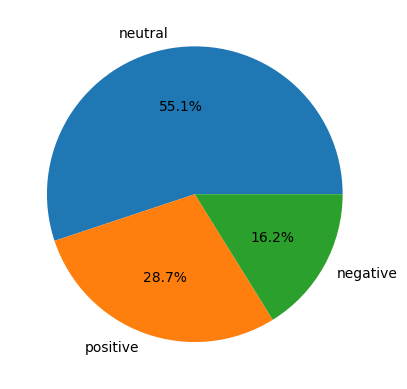

In [ ]:
# menghitung Hasil Sentiment data
plt.pie(clean_df['sentiment'].value_counts(), labels=clean_df['sentiment'].unique().tolist(), autopct='%1.1f%%')
plt.show()

Berdasarkan Hasil Lebeling menggungkana BERT, 55.1% data memiliki sentiment Netral, 28.7% positive dan 16.2% Negative

## Exploratory Data Analysis


### Analisis Statistika
Menghitung jumlah dan panjang setiap komentar:

- Jumlah Huruf
- Jumlah Kata
- Rata-rata panjang kata
- Rata-rata panjang Kalimat

In [ ]:
df = pd.read_csv('df_label.csv')
df.head()

,text_clean,sentiment,score
0,konsultasi klaim diskon https bit ly klaimdisk...,neutral,0.996867
1,upi,neutral,0.810884
2,moga anak2ku kelak prestasi allah,positive,0.979559
3,vibes main squid game deh,positive,0.913877
4,keren abis,positive,0.997432


In [ ]:
# menghitung panjang setiap comment
df['Length'] = df['text_clean'].str.len()
df.head()

,text_clean,sentiment,score,Length
0,konsultasi klaim diskon https bit ly klaimdisk...,neutral,0.996867,51
1,upi,neutral,0.810884,3
2,moga anak2ku kelak prestasi allah,positive,0.979559,33
3,vibes main squid game deh,positive,0.913877,25
4,keren abis,positive,0.997432,10


In [ ]:
# menghitung jumlah kata setiap comment
def word_count(review):
    review_list = review.split()
    return len(review_list)

df['Word_count'] = df['text_clean'].apply(word_count)
df.head()

,text_clean,sentiment,score,Length,Word_count
0,konsultasi klaim diskon https bit ly klaimdisk...,neutral,0.996867,51,7
1,upi,neutral,0.810884,3,1
2,moga anak2ku kelak prestasi allah,positive,0.979559,33,5
3,vibes main squid game deh,positive,0.913877,25,5
4,keren abis,positive,0.997432,10,2


In [ ]:
# menghitung rata-rata panjang kalimat
df['mean_word_length'] = df["Length"]/df["Word_count"]
df.head()

,text_clean,sentiment,score,Length,Word_count,mean_word_length
0,konsultasi klaim diskon https bit ly klaimdisk...,neutral,0.996867,51,7,7.285714
1,upi,neutral,0.810884,3,1,3.000000
2,moga anak2ku kelak prestasi allah,positive,0.979559,33,5,6.600000
3,vibes main squid game deh,positive,0.913877,25,5,5.000000
4,keren abis,positive,0.997432,10,2,5.000000


In [ ]:
# Menghitung rata-rata panjang kalimat (jumlah kata per kalimat)
df['Mean_Sentence_Length'] = df['Word_count'] / df['text_clean'].apply(lambda x: len(x.split()) // 2 + 1)
df.head()

,text_clean,sentiment,score,Length,Word_count,mean_word_length,Mean_Sentence_Length
0,konsultasi klaim diskon https bit ly klaimdisk...,neutral,0.996867,51,7,7.285714,1.750000
1,upi,neutral,0.810884,3,1,3.000000,1.000000
2,moga anak2ku kelak prestasi allah,positive,0.979559,33,5,6.600000,1.666667
3,vibes main squid game deh,positive,0.913877,25,5,5.000000,1.666667
4,keren abis,positive,0.997432,10,2,5.000000,1.000000


In [ ]:
# visualisasi
def visualize(col):

    print()
    plt.subplot(1,2,1)
    sns.boxplot(y=df[col], hue=df['sentiment'])
    plt.ylabel(col, labelpad=12.5)

    plt.subplot(1,2,2)
    sns.kdeplot(data=df, x=col, hue='sentiment')
    plt.legend(df['sentiment'].unique())
    plt.xlabel('')
    plt.ylabel('')

    plt.show()


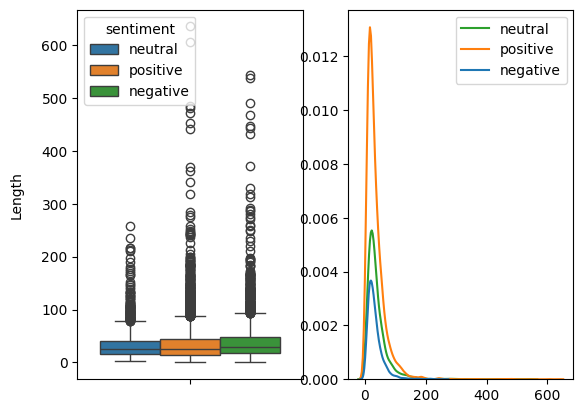

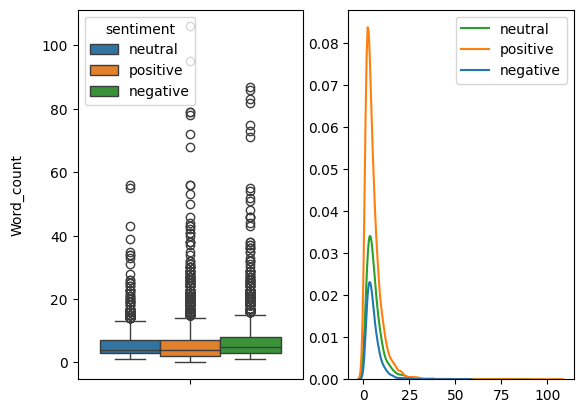

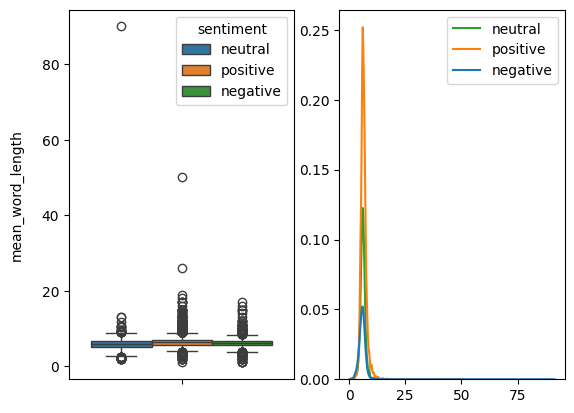

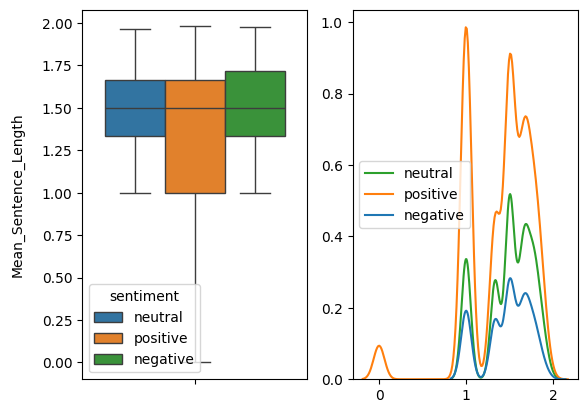

In [ ]:
features = df.columns.tolist()[3:]
for feature in features:
    visualize(feature)

### Term Frequency Analysis
Memeriksa Kata yang sering muncul

In [ ]:
def corpus(text):
    text_list = text.split()
    return text_list
df = df.dropna(subset=['text_clean'])
df['text_lists'] = df['text_clean'].apply(corpus)
df.head()

,text_clean,sentiment,score,text_lists
0,konsultasi klaim diskon https bit ly klaimdisk...,neutral,0.996867,"[konsultasi, klaim, diskon, https, bit, ly, kl..."
1,upi,neutral,0.810884,[upi]
2,moga anak2ku kelak prestasi allah,positive,0.979559,"[moga, anak2ku, kelak, prestasi, allah]"
3,vibes main squid game deh,positive,0.913877,"[vibes, main, squid, game, deh]"
4,keren abis,positive,0.997432,"[keren, abis]"


In [ ]:
def create_corpus(df, text_column):
  corpus = []
  for text_list in tqdm(df[text_column], ncols=100, colour='green'):
      if isinstance(text_list, list):
          corpus += text_list
  return corpus


df_netral = df[df['sentiment'] == 'neutral']
df_positive = df[df['sentiment'] == 'positive']
df_negative = df[df['sentiment'] == 'negative']

# Membuat korpus untuk setiap sentimen
corpus = create_corpus(df, "text_lists")
corpus_netral = create_corpus(df_netral, 'text_lists')
corpus_positive = create_corpus(df_positive, 'text_lists')
corpus_negative = create_corpus(df_negative, 'text_lists')


100%|███████████████████████████████████████████████████████| 3312/3312 [00:00<00:00, 734574.31it/s]


In [ ]:
# melihat 10 kata teratas yang sering diucapkan oleh netizen
mostCommon = Counter(corpus).most_common(10)
mostCommon

[('banget', 2188),
 ('keren', 1645),
 ('acara', 1519),
 ('orang', 962),
 ('anak', 892),
 ('nonton', 847),
 ('pinter', 799),
 ('indonesia', 773),
 ('gin', 738),
 ('lihat', 615)]

In [ ]:
# function untuk visualasi
def generate_ngrams(corpus, n):
    n_grams = ngrams(corpus, n)
    return [' '.join(grams) for grams in n_grams]

def prepare_ngram_data(corpuses, n, top_k):
    ngram_data = []
    for corpus in corpuses:
        ngrams = generate_ngrams(corpus, n)
        counter = Counter(ngrams).most_common(top_k)
        ngram_data.append(counter)
    return ngram_data

def plot_ngrams(ngram_data, titles, n=2):
    fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

    for i, (counter, title) in enumerate(zip(ngram_data, titles)):
        ngrams, counts = zip(*counter)
        axs[i].bar(ngrams, counts, color=['blue', 'green', 'red'][i])
        axs[i].set_title(f'{title} Sentiment')
        axs[i].set_xlabel(f'{n}-grams')
        axs[i].set_ylabel('Frequency')
        axs[i].tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()


corpuses = [corpus_netral, corpus_positive, corpus_negative]
titles = ['Neutral', 'Positive', 'Negative']

In [ ]:
CORPUSES = [corpus_netral, corpus_positive, corpus_negative]
TITLES = ['Neutral', 'Positive', 'Negative']

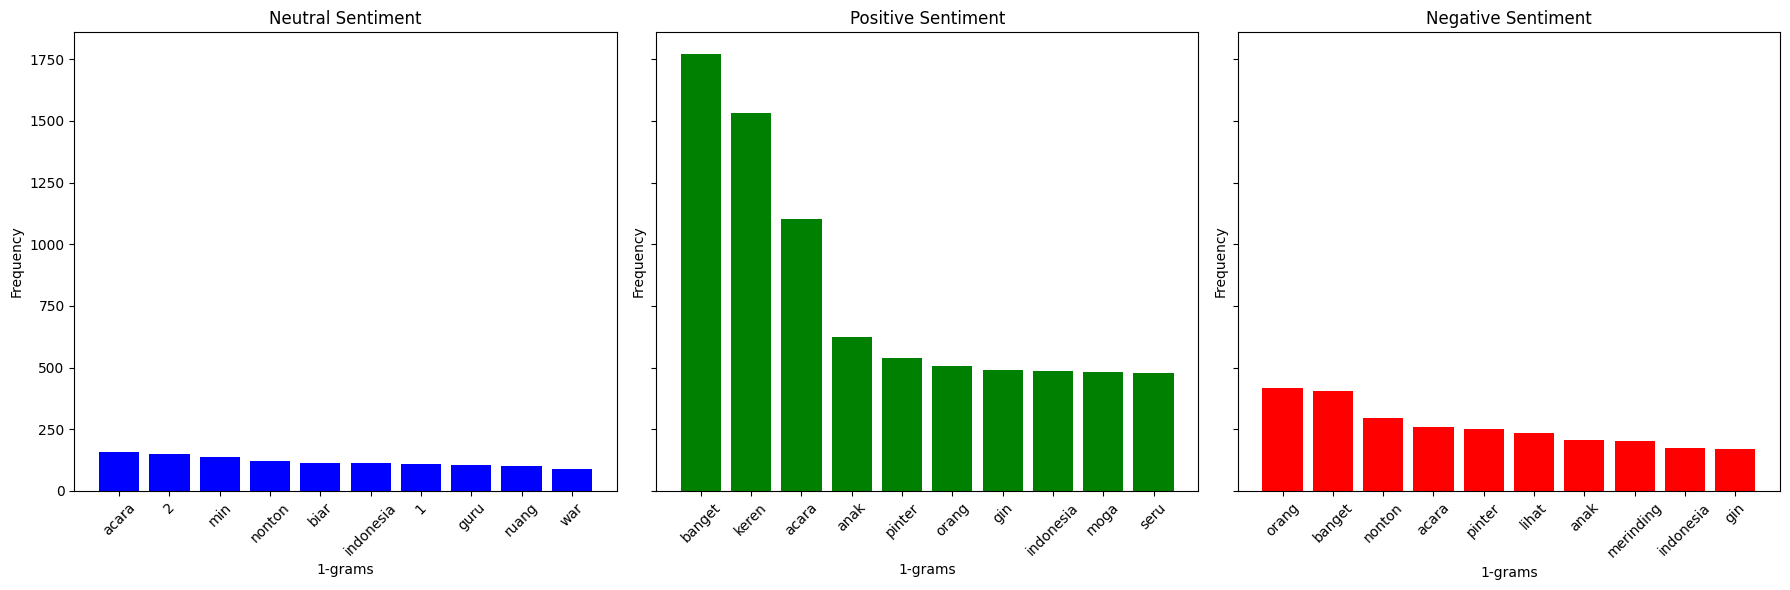

In [ ]:
# melihat ngram pada 1 grams
ngram_data = prepare_ngram_data(corpuses, n=1, top_k=10)
plot_ngrams(ngram_data, titles, n=1)


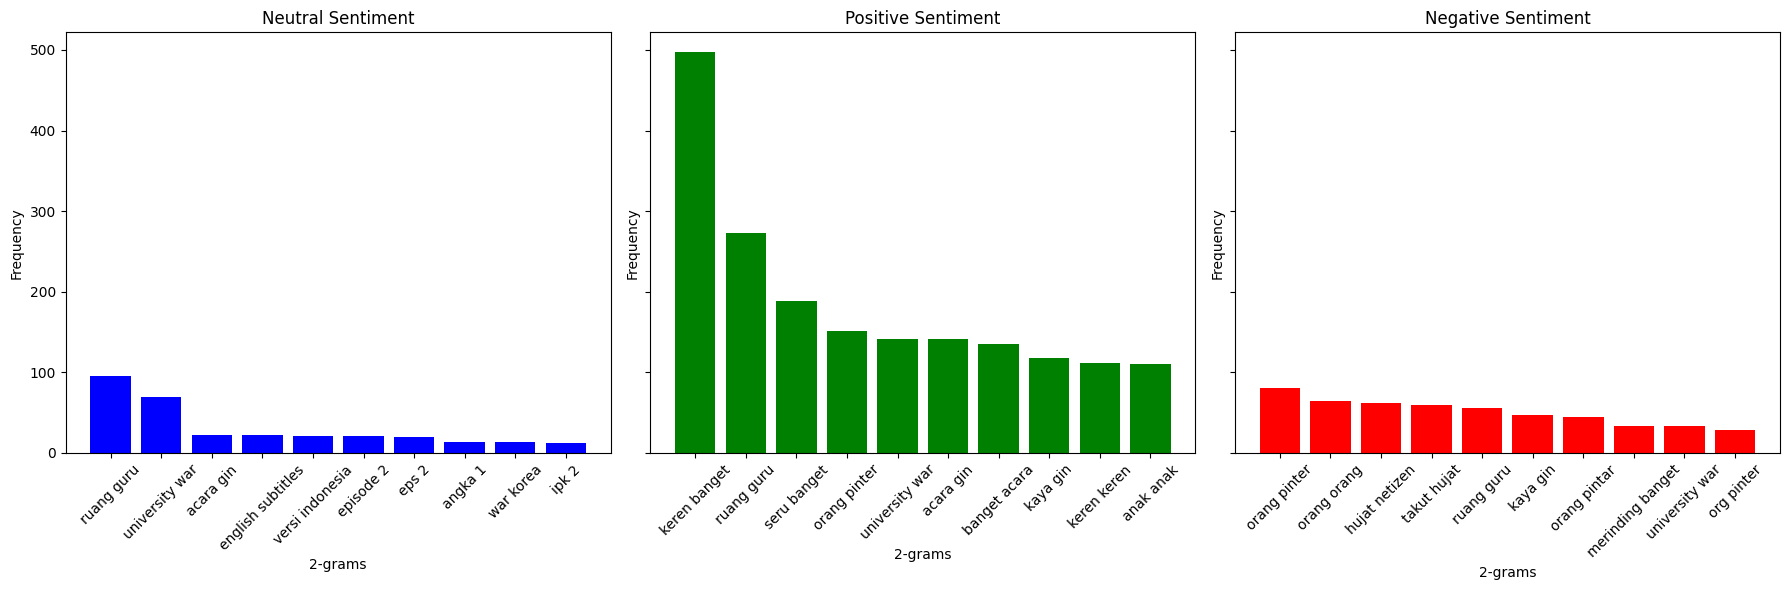

In [ ]:
# melihat ngram pada 2 grams
ngram_data = prepare_ngram_data(corpuses, n=2, top_k=10)
plot_ngrams(ngram_data, titles, n=2)


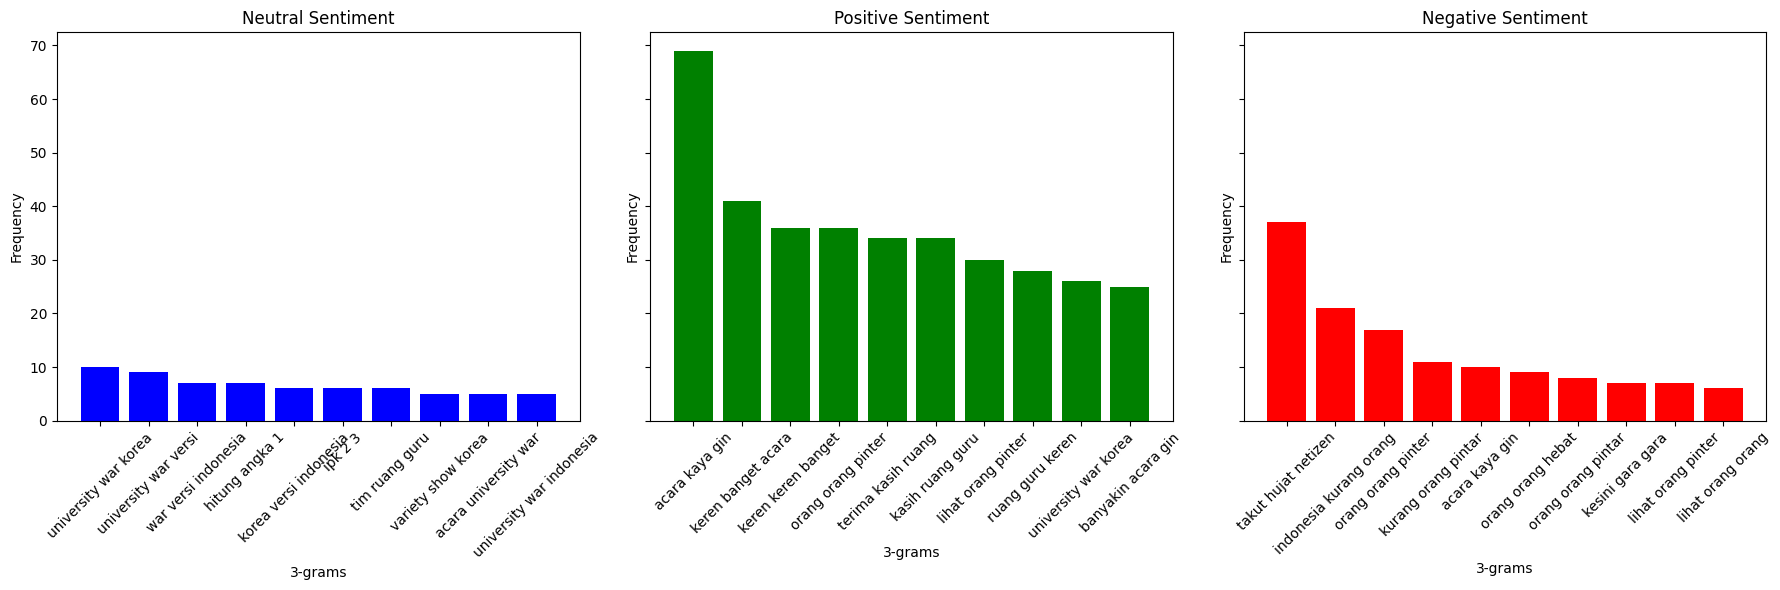

In [ ]:
# melihat ngram pada 3 grams
ngram_data = prepare_ngram_data(corpuses, n=3, top_k=10)
plot_ngrams(ngram_data, titles, n=3)


pada hasil frequency tiap kata terutama pada sentiment negatif, kata-kata tersebut tidak mengandung sentiment yang negatif akan tetapi lebih kearah positif akan tetapi bernada negatif.

pada sentiment positif, tiap kata benar-benar menjukan respon yang positif

pada sentiment netral. tiap kata menyatakan terkait nama program tanpa ada indikasi kearah negatif maupun positif


pada setiap sentiment juga terdapat kata (gin). hal ini harus dilakukan analisis lebih mendalam untuk memahami makna kata tersebut

#### WordCloud

In [ ]:
# melihat distribusi kata tiap sentimen
positive = df["text_clean"][df['sentiment'] == "positive"].values
neutral = df["text_clean"][df['sentiment'] == "neutral"].values
negative = df["text_clean"][df['sentiment'] == "negative"].values

positive = " ".join(positive)
neutral = " ".join(neutral)
negative = " ".join(negative)

In [ ]:
# Buat Word Cloud untuk setiap sentimen
pos_wc = WordCloud(width=800, height=400, background_color='white', colormap='Dark2').generate(positive)
neg_wc = WordCloud(width=800, height=400, background_color='white', colormap='Paired').generate(negative)
neu_wc = WordCloud(width=800, height=400, background_color='white', colormap='flag').generate(neutral)

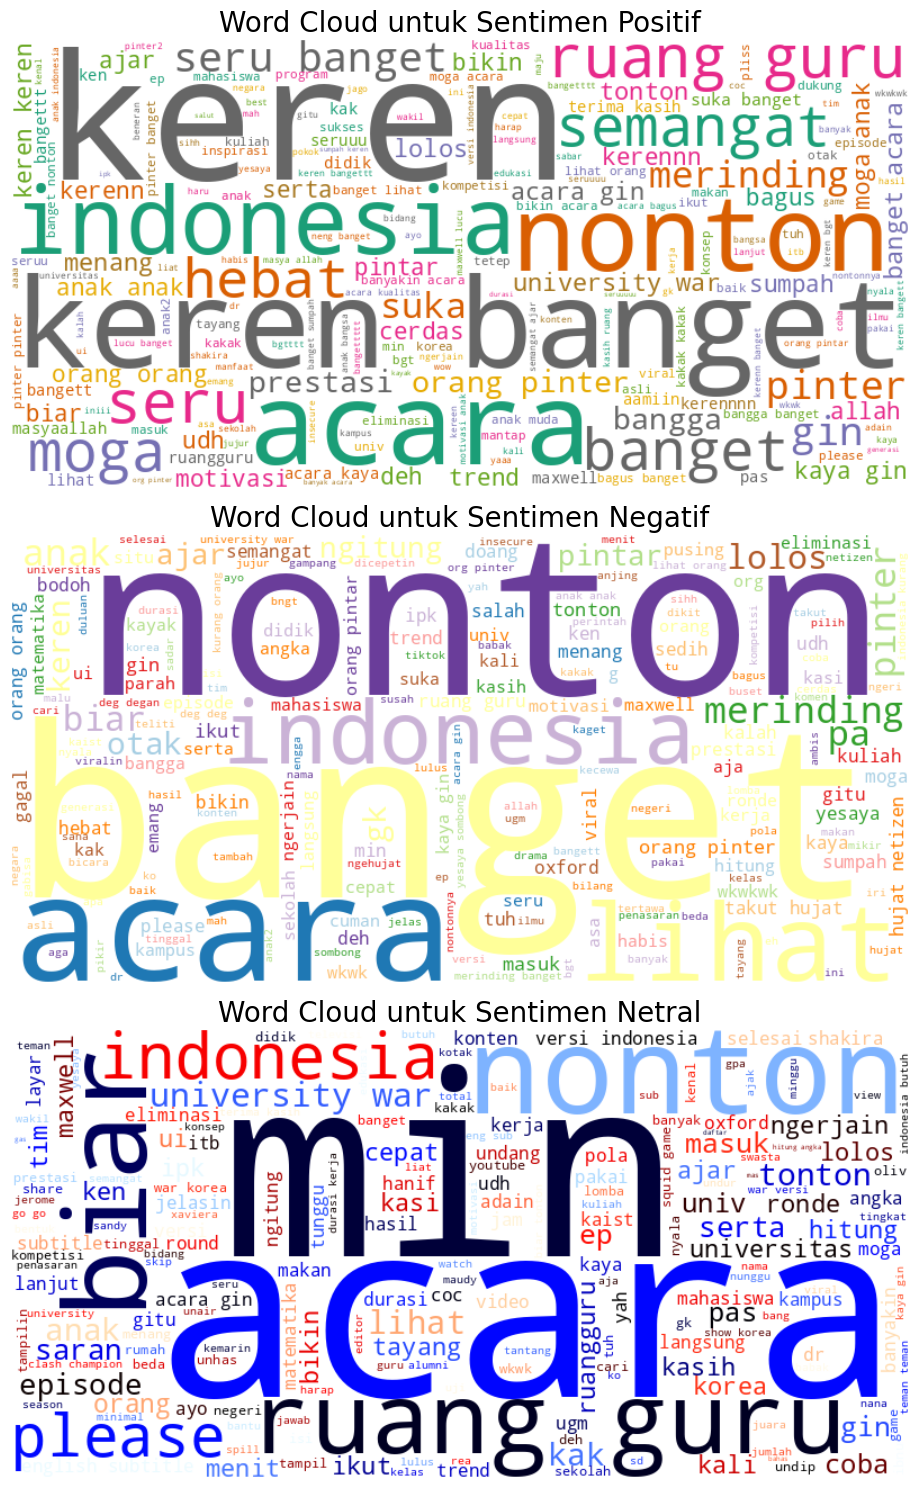

In [ ]:
# Tampilkan Word Cloud dalam satu diagram
plt.figure(figsize=(20, 15))

# Word Cloud untuk sentimen positif
plt.subplot(3, 1, 1)
plt.imshow(pos_wc, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud untuk Sentimen Positif', fontsize=20)

# Word Cloud untuk sentimen negatif
plt.subplot(3, 1, 2)
plt.imshow(neg_wc, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud untuk Sentimen Negatif', fontsize=20)

# Word Cloud untuk sentimen netral
plt.subplot(3, 1, 3)
plt.imshow(neu_wc, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud untuk Sentimen Netral', fontsize=20)
plt.subplots_adjust(hspace=0.5)
plt.tight_layout()
plt.show()


Terlihat untuk kalimat Negative ataupun Netral tidak menunjukan bahwa acara tersebut negative akan tetapi negative ke arah yg positive

## Feature Extraction
Ekstrasi pada setiap teks menggunakan BERT

In [ ]:
# load data
df = pd.read_csv("df_label.csv")
df['text_clean'] = df['text_clean'].astype("str")

In [ ]:
# import library
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch

In [ ]:
pretrained = "mdhugol/indonesia-bert-sentiment-classification"
tokenizer = AutoTokenizer.from_pretrained(pretrained)
model = AutoModelForSequenceClassification.from_pretrained(pretrained)

# Fungsi untuk mengekstraksi fitur menggunakan BERT
def extract_features(text):
    inputs = tokenizer(text, return_tensors='pt', truncation=True, padding=True, max_length=512)
    with torch.no_grad():
        outputs = model(**inputs)
    # Mengambil embedding dari layer terakhir
    embeddings = outputs.logits.numpy()
    return embeddings.flatten()

In [ ]:
# melakukan ekstrasi feature
df["features"] = df["text_clean"].apply(extract_features)

In [ ]:
df.head()

In [ ]:
df.info()

In [ ]:
# save data
df.to_csv("data_model.csv", index=False)

## Skema 1
Perbandingan setiap skema adalah model dan ukuran dataset. pada skema 1 menggunakan 80% train 20% test dan model menggunakan SVM

In [ ]:
# import library
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
# membagi data feature dan label
X = df['features'].tolist()
y = df['sentiments'].values

encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

In [ ]:
# Membagi data menjadi data latih sebanyak 0% dan data uji 20%

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

In [ ]:
# Melatih model SVM
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

SVC(kernel='linear')

In [ ]:
# melakukan prediksi
y_pred_svm_train = svm_model.predict(X_train)
y_pred_svm_test = svm_model.predict(X_test)


In [ ]:
# melakukan evaluasi model
accuracy_svm_train = accuracy_score(y_train, y_pred_svm_train)
accuracy_svm_test = accuracy_score(y_test, y_pred_svm_test)
print(f'Accuracy model SVM: {accuracy_svm}')

Accuracy model SVM: 0.9988057324840764


## Skema 2
Pada Skema 2, disini menggunakan data train sebanyak 70% dan 30% untuk test.

Untuk Model Menggunakan algoritma LSTM

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, SimpleRNN, Embedding, Dropout, Flatten, Input

In [ ]:
# menentukan feature dan labels
X = np.array(df['features'].tolist())
y = df['sentiments'].values

In [ ]:
# Membagi data menjadi data latih sebanyak 70% dan data uji 30%
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)
X_train = np.expand_dims(X_train, axis=1)
X_test = np.expand_dims(X_test, axis=1)

In [ ]:
X_test.shape

(3768, 1, 3)

In [ ]:
X_test[0]

array([[ 3.5004272, -2.214315 , -1.4985298]], dtype=float32)

In [ ]:
# membuat model LSTM
model_lstm = Sequential([
    LSTM(units=128, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    Flatten(),
    Dense(64, activation="relu"),
    Dense(3, activation="softmax")
])

In [ ]:
# compile model
model_lstm.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model_lstm.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
275/275 [==============================] - 5s 7ms/step - loss: 0.1552 - accuracy: 0.9763
Epoch 2/10
275/275 [==============================] - 2s 7ms/step - loss: 0.0233 - accuracy: 0.9931
Epoch 3/10
275/275 [==============================] - 3s 9ms/step - loss: 0.0141 - accuracy: 0.9973
Epoch 4/10
275/275 [==============================] - 2s 8ms/step - loss: 0.0124 - accuracy: 0.9958
Epoch 5/10
275/275 [==============================] - 2s 6ms/step - loss: 0.0115 - accuracy: 0.9960
Epoch 6/10
275/275 [==============================] - 2s 6ms/step - loss: 0.0110 - accuracy: 0.9957
Epoch 7/10
275/275 [==============================] - 2s 6ms/step - loss: 0.0090 - accuracy: 0.9972
Epoch 8/10
275/275 [==============================] - 2s 6ms/step - loss: 0.0085 - accuracy: 0.9969
Epoch 9/10
275/275 [==============================] - 2s 6ms/step - loss: 0.0094 - accuracy: 0.9966
Epoch 10/10
275/275 [==============================] - 2s 6ms/step - loss: 0.0072 - accuracy: 0.9980

In [ ]:
y_pred_lstm = model_lstm.predict(X_test)

118/118 [==============================] - 1s 2ms/step


In [ ]:
y_pred_lstm = np.argmax(y_pred_lstm, axis=-1)

In [ ]:
accuracy_lstm =  accuracy_score(y_test, y_pred_lstm)
print(accuracy_lstm)

0.9952229299363057


## Skema 3
Pada Skema 3 data akan dibagi menjadi 90% train dan 10% test, Model yang digunakan adalah RNN

In [ ]:
# menentukan feature dan labels
X = np.array(df['features'].tolist())
y = df['sentiments'].values

In [ ]:
# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.1, random_state=42)
X_train = np.expand_dims(X_train, axis=1)
X_test = np.expand_dims(X_test, axis=1)

In [ ]:
# membuat model LSTM
model_rnn = Sequential([
    SimpleRNN(units=128, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True),
    SimpleRNN(64, return_sequences=True),
    SimpleRNN(64),
    Dropout(0.2),
    Flatten(),
    Dense(64, activation="relu"),
    Dense(3, activation="softmax")
])

In [ ]:
# compile model
model_rnn.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model_rnn.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
354/354 [==============================] - 6s 7ms/step - loss: 0.0518 - accuracy: 0.9832
Epoch 2/10
354/354 [==============================] - 3s 7ms/step - loss: 0.0222 - accuracy: 0.9905
Epoch 3/10
354/354 [==============================] - 3s 9ms/step - loss: 0.0186 - accuracy: 0.9927
Epoch 4/10
354/354 [==============================] - 3s 9ms/step - loss: 0.0169 - accuracy: 0.9936
Epoch 5/10
354/354 [==============================] - 3s 7ms/step - loss: 0.0160 - accuracy: 0.9938
Epoch 6/10
354/354 [==============================] - 3s 7ms/step - loss: 0.0111 - accuracy: 0.9952
Epoch 7/10
354/354 [==============================] - 3s 7ms/step - loss: 0.0091 - accuracy: 0.9963
Epoch 8/10
354/354 [==============================] - 4s 11ms/step - loss: 0.0178 - accuracy: 0.9938
Epoch 9/10
354/354 [==============================] - 3s 7ms/step - loss: 0.0123 - accuracy: 0.9956
Epoch 10/10
354/354 [==============================] - 3s 7ms/step - loss: 0.0095 - accuracy: 0.996

In [ ]:
# melakukan prediksi
y_pred_rnn = model_rnn.predict(X_test)
y_pred_rnn = np.argmax(y_pred_rnn, axis=-1)

40/40 [==============================] - 0s 2ms/step


In [ ]:
# melihat akurasi model RNN
accuracy_rnn =  accuracy_score(y_test, y_pred_rnn)
print(accuracy_rnn)

0.9952229299363057


## Result

In [ ]:
result_model = pd.DataFrame({
    "Model": ["SVM", "LSTM", "RNN"],
    "Accuracy Testing":[ accuracy_svm, accuracy_lstm, accuracy_rnn]
})
result_model.set_index("Model")

,Accuracy Testing
Model,
SVM,0.998806
LSTM,0.995223
RNN,0.995223


Pada Hasil akurasi Testing Menunjukan hasil yang bagus, salah satu faktor penyebab akurasi yang bagus ini karena menggunakan ekstrasi fitur BERT

## Inference

In [ ]:
your_text = str(input("Bagaimana Pendapatmu Terhadap Acara Ruangguru yaitu Clash of Champions? "))
your_model = int(input("Pilih nomor model yang ingin anda gunakan, 1. SVM 2. LSTM, 3.RNN ? "))

def testing(text, model):
  print("=============================================")
  text = preprocess_text(text)
  text = stemmingText(text)
  text = extract_features(text)
  text = text.reshape(1, -1)


  if model == 1:
    print("Anda menggunakan model SVM\n")
    pred = svm_model.predict(text)
    label = encoder.inverse_transform(pred)
    print(f"Anda Memiliki Sentiment yang {label[0]} terhadap acara Clash of Champions dari Ruangguru")
  elif model == 2:
    print("Anda menggunakan model LSTM\n")
    text = np.expand_dims(text, axis=1)
    pred = model_lstm.predict(text)
    pred = np.argmax(pred, axis=-1)
    label = encoder.inverse_transform(pred)
    print(f"Anda Memiliki Sentiment yang {label[0]} terhadap acara Clash of Champions dari Ruangguru")
  elif model == 3:
    print("Anda menggunakan model RNN\n")
    text = np.expand_dims(text, axis=1)
    pred = model_rnn.predict(text)
    pred = np.argmax(pred, axis=-1)
    label = encoder.inverse_transform(pred)
    print(f"Anda Memiliki Sentiment yang {label[0]} terhadap acara Clash of Champions dari Ruangguru")
  else:
    print("Anda salah memasukkan parameter")

testing(your_text, your_model)

Bagaimana Pendapatmu Terhadap Acara Ruangguru yaitu Clash of Champions? Bagus Sekali, Pada Pintar mereka
Pilih nomor model yang ingin anda gunakan, 1. SVM 2. LSTM, 3.RNN ? 2
Anda menggunakan model LSTM

1/1 [==============================] - 0s 18ms/step
Anda Memiliki Sentiment yang positive terhadap acara Clash of Champions dari Ruangguru


In [ ]:
!pip freeze > requirements.txt